In [1]:
import pandas as pd
import numpy as np
import scipy.special as sc
import matplotlib as m
import matplotlib.pyplot as plt

In [2]:
# control experiment

# 3 reps, 100 iterations 
# samples from ONLY WT!

In [3]:
# all bayexpress results
# 3 replicates
# BF_21 > 100

CONTROL_R3_bayexpress_FC0 = pd.read_csv(f'DGE_results/CONTROL_R3_1_bayexpress.csv').iloc[:,1:2]
CONTROL_R3_bayexpress_FC1 = pd.read_csv(f'DGE_results/CONTROL_R3_1_bayexpress.csv').iloc[:,1:2]
CONTROL_R3_bayexpress_FC2 = pd.read_csv(f'DGE_results/CONTROL_R3_1_bayexpress.csv').iloc[:,1:2]

for i in range(1,101):

    data = pd.read_csv(f'DGE_results/CONTROL_R3_{i}_bayexpress.csv').iloc[:,1:]

    # criteria 0 for significance: (BF_21 > 100) & (abs(FC) > 0)
    CONTROL_R3_bayexpress_FC0[f'{i}'] = (data.BF_21 > 100) & (abs(data.FC) > 0)

    # criteria 1 for significance: (BF_21 > 100) & (abs(FC) > 1)
    CONTROL_R3_bayexpress_FC1[f'{i}'] = (data.BF_21 > 100) & (abs(data.FC) > 1)

    # criteria 2 for significance: (BF_21 > 100) & (abs(FC) > 2)
    CONTROL_R3_bayexpress_FC2[f'{i}'] = (data.BF_21 > 100) & (abs(data.FC) > 2)

CONTROL_R3_bayexpress_FC0['Ntrue'] = [(CONTROL_R3_bayexpress_FC0.iloc[i].value_counts().get(True, 0)) for i in range(len(CONTROL_R3_bayexpress_FC0))]

CONTROL_R3_bayexpress_FC1['Ntrue'] = [(CONTROL_R3_bayexpress_FC1.iloc[i].value_counts().get(True, 0)) for i in range(len(CONTROL_R3_bayexpress_FC1))]

CONTROL_R3_bayexpress_FC2['Ntrue'] = [(CONTROL_R3_bayexpress_FC2.iloc[i].value_counts().get(True, 0)) for i in range(len(CONTROL_R3_bayexpress_FC2))]

display(CONTROL_R3_bayexpress_FC0)
display(CONTROL_R3_bayexpress_FC1)
display(CONTROL_R3_bayexpress_FC2)

/var/folders/dl/6r82c34d3pbdmnyfpk1l0ff00000gn/T/ipykernel_86777/2651538179.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CONTROL_R3_bayexpress_FC0[f'{i}'] = (data.BF_21 > 100) & (abs(data.FC) > 0)
/var/folders/dl/6r82c34d3pbdmnyfpk1l0ff00000gn/T/ipykernel_86777/2651538179.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  CONTROL_R3_bayexpress_FC1[f'{i}'] = (data.BF_21 > 100) & (abs(data.FC) > 1)
/var/folders/dl/6r82c34d3pbdmnyfpk1l0ff00000gn/T/ipykernel_86777/2651538179.py:20: PerformanceWarning: DataFrame is highly f

,locus_name,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,Ntrue
0,15S_rRNA,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
1,21S_rRNA,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
2,HRA1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
3,ICR1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
4,LSR1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
7122,tY(GUA)M1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
7123,tY(GUA)M2,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
7124,tY(GUA)O,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0


,locus_name,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,Ntrue
0,15S_rRNA,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
1,21S_rRNA,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
2,HRA1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
3,ICR1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
4,LSR1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
7122,tY(GUA)M1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
7123,tY(GUA)M2,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
7124,tY(GUA)O,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0


,locus_name,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,Ntrue
0,15S_rRNA,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
1,21S_rRNA,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
2,HRA1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
3,ICR1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
4,LSR1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
7122,tY(GUA)M1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
7123,tY(GUA)M2,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
7124,tY(GUA)O,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0


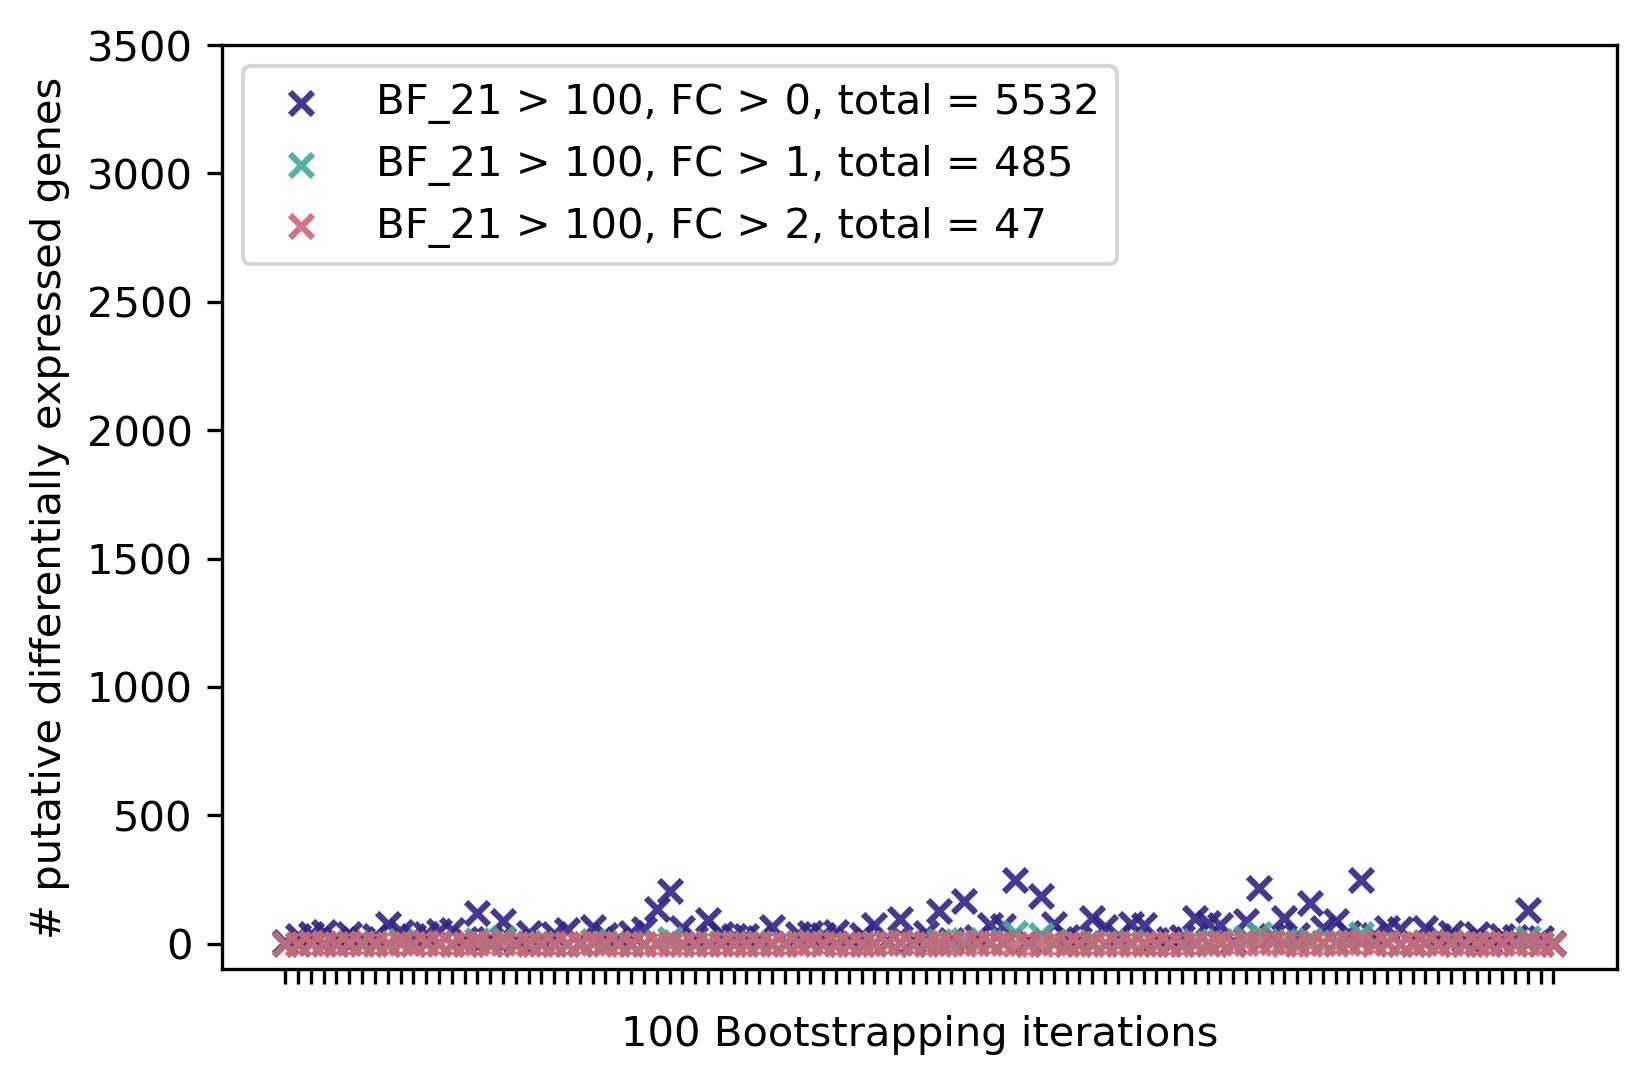

In [4]:
fig, axs = plt.subplots(1, 1, sharey=True, figsize=(6, 4), dpi=300)

# scatters
axs.scatter(np.arange(1, 101),
            CONTROL_R3_bayexpress_FC0.iloc[:, 1:-1].sum(axis=0),
            c='#332288', s=30,
            label=f'BF_21 > 100, FC > 0, total = {sum(CONTROL_R3_bayexpress_FC0.iloc[:,1:-1].sum(axis=0))}',
            alpha=0.9, marker='x')

axs.scatter(np.arange(1, 101),
            CONTROL_R3_bayexpress_FC1.iloc[:, 1:-1].sum(axis=0),
            c='#44AA99', s=30,
            label=f'BF_21 > 100, FC > 1, total = {sum(CONTROL_R3_bayexpress_FC1.iloc[:,1:-1].sum(axis=0))}',
            alpha=0.9, marker='x')

axs.scatter(np.arange(1, 101),
            CONTROL_R3_bayexpress_FC2.iloc[:, 1:-1].sum(axis=0),
            c='#CC6677', s=30,
            label=f'BF_21 > 100, FC > 2, total = {sum(CONTROL_R3_bayexpress_FC2.iloc[:,1:-1].sum(axis=0))}',
            alpha=0.9, marker='x')

axs.legend(loc='upper left')

# Use tex in labels
axs.set_xticks(np.arange(1, 101))
axs.set_xticklabels('')

# formatting y axis ticks
plt.gca().ticklabel_format(axis='y', style='plain', useOffset=False)

axs.set_xlabel('100 Bootstrapping iterations')
axs.set_ylabel('# putative differentially expressed genes')

# Set y limit 3500
axs.set_ylim(-100, 3500)

plt.show()


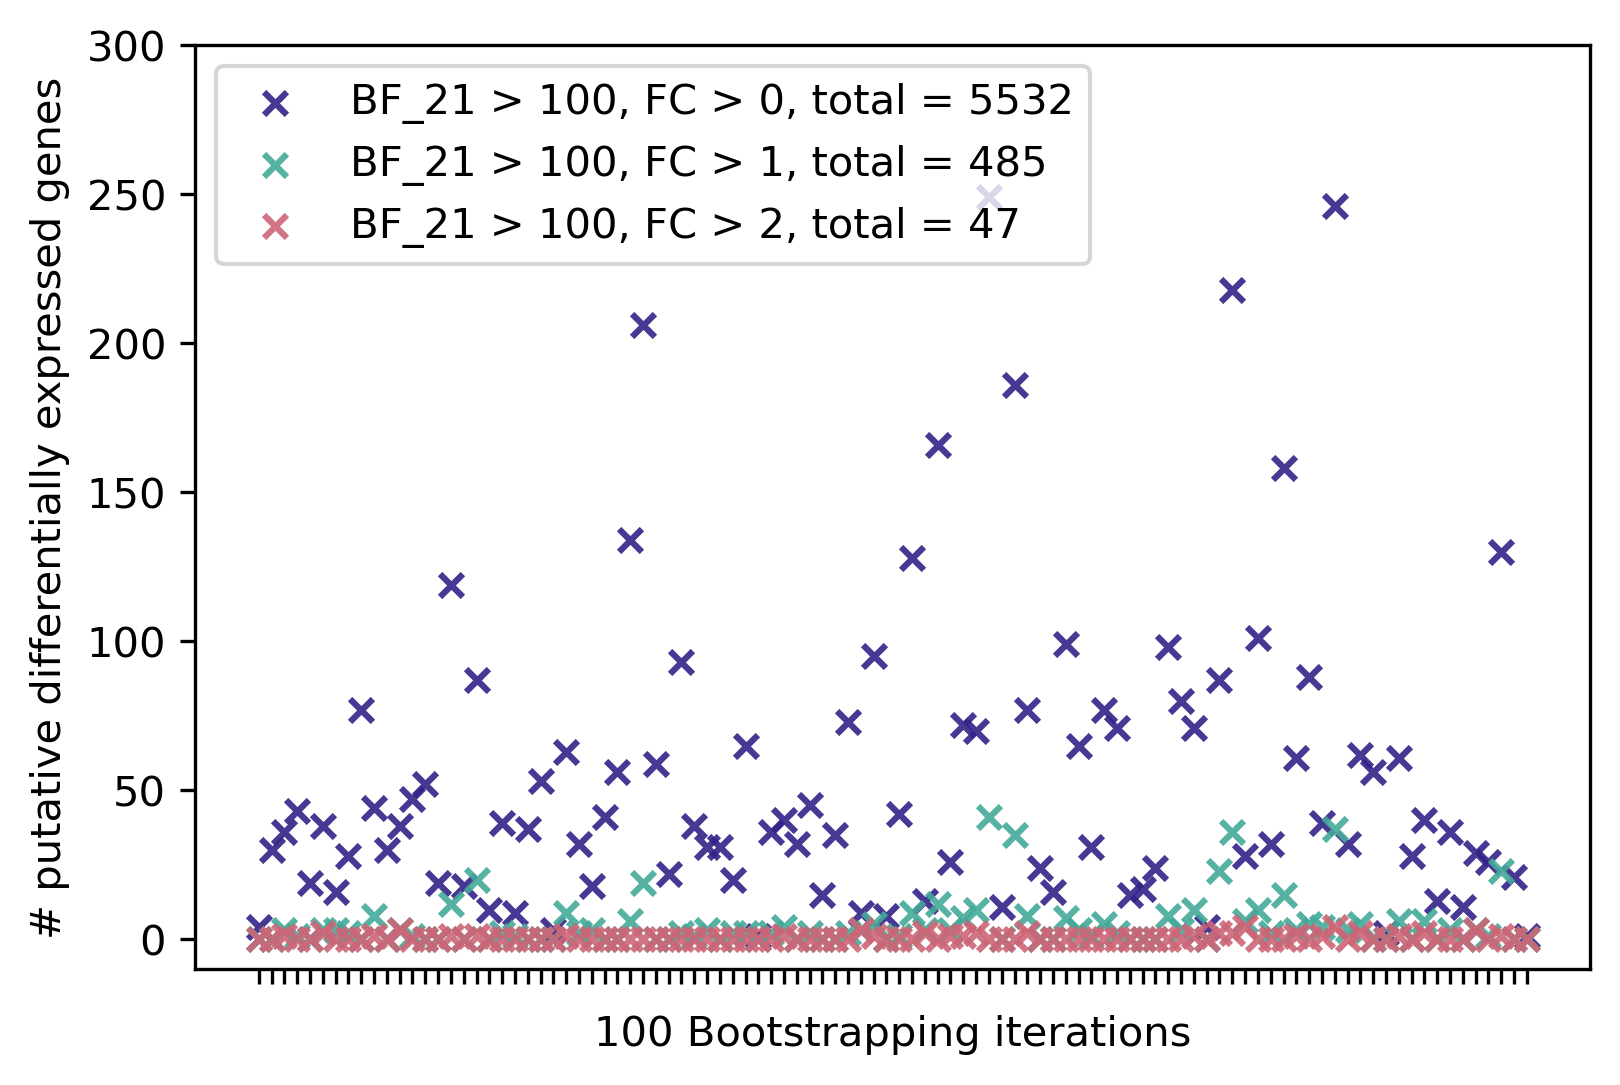

In [5]:
# zoom in

fig, axs = plt.subplots(1, 1, sharey=True, figsize=(6, 4), dpi=300)

# scatters
axs.scatter(np.arange(1, 101),
            CONTROL_R3_bayexpress_FC0.iloc[:, 1:-1].sum(axis=0),
            c='#332288', s=30,
            label=f'BF_21 > 100, FC > 0, total = {sum(CONTROL_R3_bayexpress_FC0.iloc[:,1:-1].sum(axis=0))}',
            alpha=0.9, marker='x')

axs.scatter(np.arange(1, 101),
            CONTROL_R3_bayexpress_FC1.iloc[:, 1:-1].sum(axis=0),
            c='#44AA99', s=30,
            label=f'BF_21 > 100, FC > 1, total = {sum(CONTROL_R3_bayexpress_FC1.iloc[:,1:-1].sum(axis=0))}',
            alpha=0.9, marker='x')

axs.scatter(np.arange(1, 101),
            CONTROL_R3_bayexpress_FC2.iloc[:, 1:-1].sum(axis=0),
            c='#CC6677', s=30,
            label=f'BF_21 > 100, FC > 2, total = {sum(CONTROL_R3_bayexpress_FC2.iloc[:,1:-1].sum(axis=0))}',
            alpha=0.9, marker='x')

axs.legend(loc='upper left')

# Use tex in labels
axs.set_xticks(np.arange(1, 101))
axs.set_xticklabels('')

# formatting y axis ticks
plt.gca().ticklabel_format(axis='y', style='plain', useOffset=False)

axs.set_xlabel('100 Bootstrapping iterations')
axs.set_ylabel('# putative differentially expressed genes')

# Set y limit to 300
axs.set_ylim(-10, 300)

plt.show()

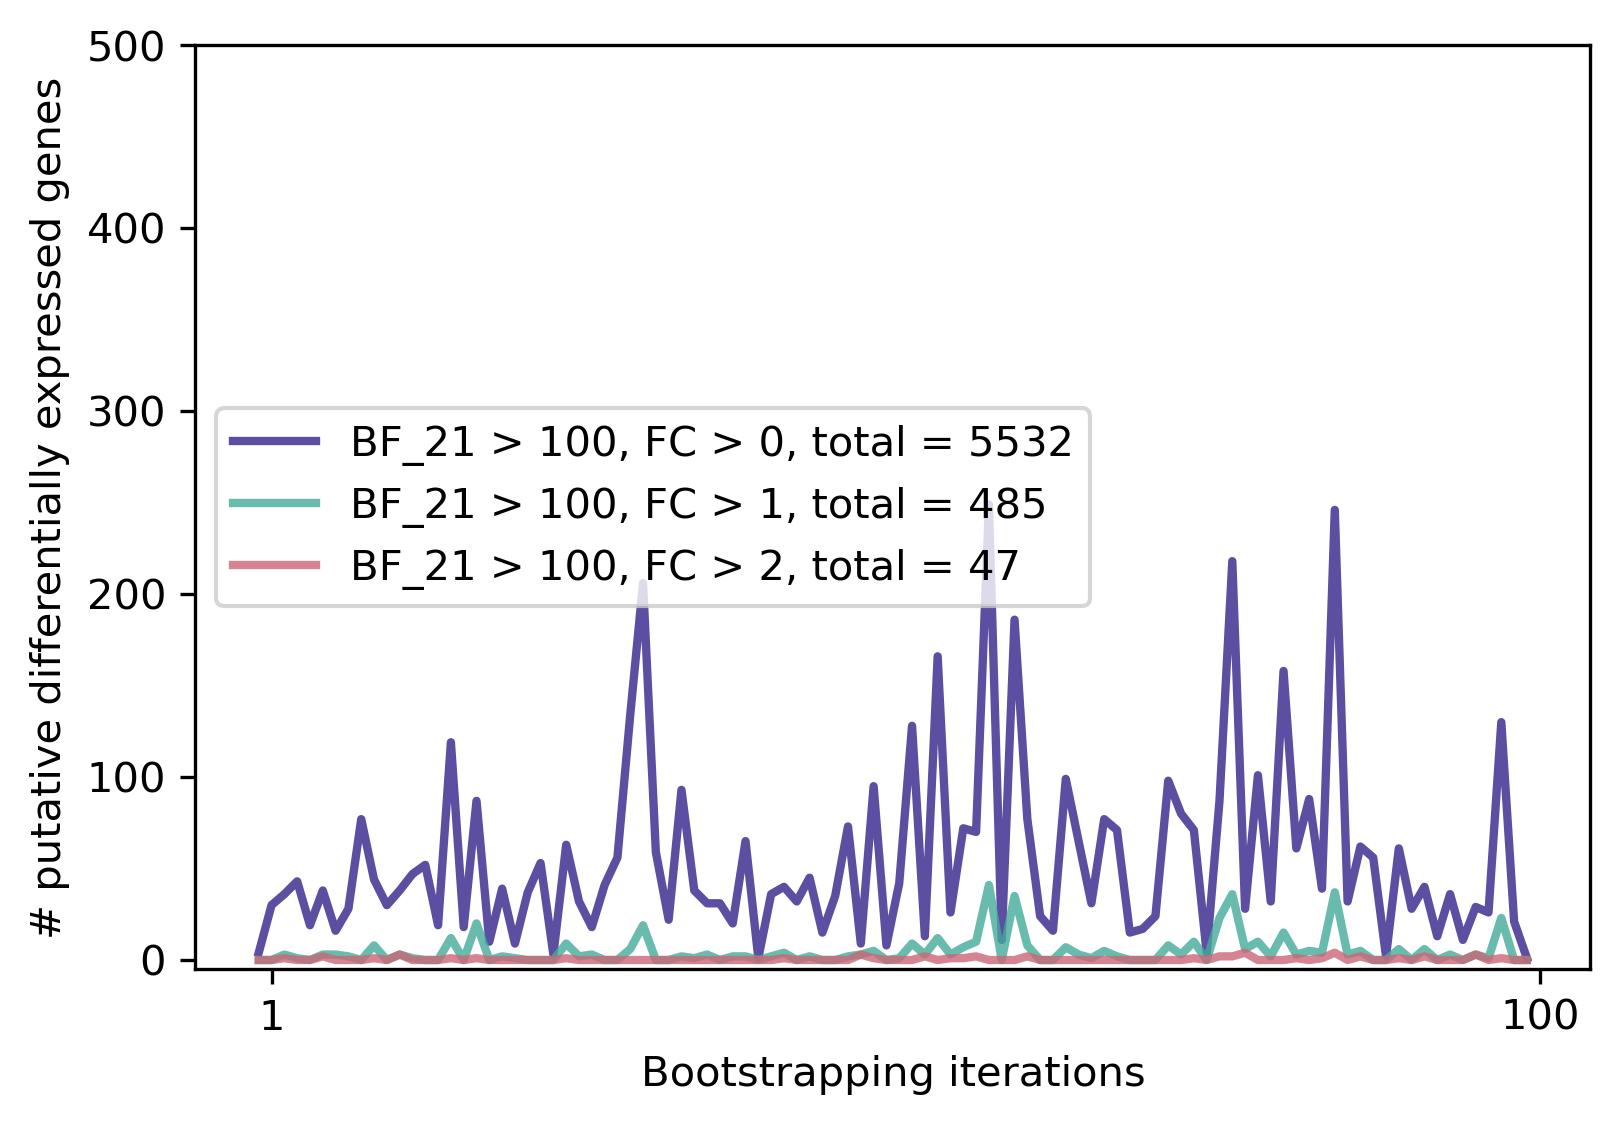

In [6]:
# just a different visualisation


fig, axs = plt.subplots(1,1,sharey=True, figsize=(6,4), dpi=300)


series = CONTROL_R3_bayexpress_FC0.iloc[:,1:-1].sum(axis=0)
series.plot(kind='line', color='#332288', alpha=0.8, ylim=[-5,500], linewidth=2, label=f'BF_21 > 100, FC > 0, total = {sum(CONTROL_R3_bayexpress_FC0.iloc[:,1:-1].sum(axis=0))}')

series = CONTROL_R3_bayexpress_FC1.iloc[:,1:-1].sum(axis=0)
series.plot(kind='line', color='#44AA99', alpha=0.8, ylim=[-5,500], linewidth=2, label=f'BF_21 > 100, FC > 1, total = {sum(CONTROL_R3_bayexpress_FC1.iloc[:,1:-1].sum(axis=0))}')

series = CONTROL_R3_bayexpress_FC2.iloc[:,1:-1].sum(axis=0)
series.plot(kind='line', color='#CC6677', alpha=0.8, ylim=[-5,500], linewidth=2, label=f'BF_21 > 100, FC > 2, total = {sum(CONTROL_R3_bayexpress_FC2.iloc[:,1:-1].sum(axis=0))}')

axs.set_xlabel('Bootstrapping iterations')
axs.set_ylabel('# putative differentially expressed genes')

axs.set_xticks([1,100])
axs.set_xticklabels(['1', '100'])

axs.legend(loc='center left')

plt.show()


In [7]:
# R3 means number of replicates in 100 bootstrapping iterations is 3
# FC > 0
# got hits (any)

# let's find out which genes we found to produce hits in the control and see if we can identify them with Bayes factors for consistency

print('Find genes that got hits in the control experiment')
display(CONTROL_R3_bayexpress_FC0.loc[CONTROL_R3_bayexpress_FC0.Ntrue > 0])

# importing results from differential gene expression anaylsis to check what they are
RALL_bayexpress = pd.read_csv('RALL_bayexpress.csv', index_col=0)

print('All replicates, bayexpress results')
display(RALL_bayexpress)

print('Display only the genes that got hits in the control experiment')
display(RALL_bayexpress.iloc[(CONTROL_R3_bayexpress_FC0.loc[CONTROL_R3_bayexpress_FC0.Ntrue > 0].index)])

print('Display only the genes that got hits in the control experiment + where identified with bayes factors for consistency of replicates in the WT')
display(RALL_bayexpress.iloc[(CONTROL_R3_bayexpress_FC0.loc[CONTROL_R3_bayexpress_FC0.Ntrue > 0].index)].loc[(RALL_bayexpress.BF_k1_WT > 1)])

print('Display only the genes that got hits in the control experiment + where NOT identified with bayes factors for consistency of replicates in the WT')
display(RALL_bayexpress.iloc[(CONTROL_R3_bayexpress_FC0.loc[CONTROL_R3_bayexpress_FC0.Ntrue > 0].index)].loc[(RALL_bayexpress.BF_k1_WT < 1)])

print('Among the genes that produced 0 hits, where there any genes that would be identified as variable by BF_k1 > 1?')
display(RALL_bayexpress.iloc[(CONTROL_R3_bayexpress_FC0.loc[CONTROL_R3_bayexpress_FC0.Ntrue == 0].index)].loc[(RALL_bayexpress.BF_k1_WT > 1)])

Find genes that got hits in the control experiment


,locus_name,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,Ntrue
1,21S_rRNA,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
58,SCR1,False,False,True,False,False,True,True,True,False,...,True,False,False,False,True,False,True,True,False,34
60,TLC1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
63,YAL003W,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,6
65,YAL005C,False,False,True,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6658,YPR132W,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,6
6675,YPR145W,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,12
6696,YPR160W,False,False,True,True,False,True,False,False,False,...,False,False,False,False,False,False,True,True,False,41
6700,YPR163C,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,9


All replicates, bayexpress results


,locus_name,BF,FC,BF_k1_WT,AOTP_WT,BF_k1_Snf2,AOTP_Snf2
0,15S_rRNA,-3.710645,0.274047,-107.138056,False,53.627445,True
1,21S_rRNA,-1.302642,0.147177,362.115507,True,1052.203968,True
2,HRA1,-5.206545,-0.564787,-240.338654,False,-258.581365,False
3,ICR1,76.746125,0.504048,-194.077441,False,-196.467262,False
4,LSR1,0.451012,0.120243,251.787125,True,478.066414,True
...,...,...,...,...,...,...,...
7121,tY(GUA)J2,-7.312143,0.861839,-270.299503,False,-281.214963,False
7122,tY(GUA)M1,-7.406574,0.022303,-262.736078,False,-275.253246,False
7123,tY(GUA)M2,-7.727890,0.183767,-271.177492,False,-284.863866,False
7124,tY(GUA)O,-7.622253,0.347266,-270.291196,False,-282.682788,False


Display only the genes that got hits in the control experiment


,locus_name,BF,FC,BF_k1_WT,AOTP_WT,BF_k1_Snf2,AOTP_Snf2
1,21S_rRNA,-1.302642,0.147177,362.115507,True,1052.203968,True
58,SCR1,10.530223,0.125605,3463.535578,True,5939.249536,True
60,TLC1,777.763124,0.472738,284.895344,True,178.488220,True
63,YAL003W,6673.475968,-0.594133,954.663405,True,259.131618,True
65,YAL005C,5690.406648,-0.467587,3022.095699,True,1476.210000,True
...,...,...,...,...,...,...,...
6658,YPR132W,-3.551882,0.008014,945.361750,True,498.997018,True
6675,YPR145W,5839.427360,-0.752430,1388.331981,True,-51.875966,False
6696,YPR160W,16099.516352,-2.085180,5986.768507,True,-23.570301,False
6700,YPR163C,294.914637,-0.176442,1580.792794,True,1072.420797,True


Display only the genes that got hits in the control experiment + where identified with bayes factors for consistency of replicates in the WT


,locus_name,BF,FC,BF_k1_WT,AOTP_WT,BF_k1_Snf2,AOTP_Snf2
1,21S_rRNA,-1.302642,0.147177,362.115507,True,1052.203968,True
58,SCR1,10.530223,0.125605,3463.535578,True,5939.249536,True
60,TLC1,777.763124,0.472738,284.895344,True,178.488220,True
63,YAL003W,6673.475968,-0.594133,954.663405,True,259.131618,True
65,YAL005C,5690.406648,-0.467587,3022.095699,True,1476.210000,True
...,...,...,...,...,...,...,...
6658,YPR132W,-3.551882,0.008014,945.361750,True,498.997018,True
6675,YPR145W,5839.427360,-0.752430,1388.331981,True,-51.875966,False
6696,YPR160W,16099.516352,-2.085180,5986.768507,True,-23.570301,False
6700,YPR163C,294.914637,-0.176442,1580.792794,True,1072.420797,True


Display only the genes that got hits in the control experiment + where NOT identified with bayes factors for consistency of replicates in the WT


,locus_name,BF,FC,BF_k1_WT,AOTP_WT,BF_k1_Snf2,AOTP_Snf2


Among the genes that produced 0 hits, where there any genes that would be identified as variable by BF_k1 > 1?


,locus_name,BF,FC,BF_k1_WT,AOTP_WT,BF_k1_Snf2,AOTP_Snf2
4,LSR1,0.451012,0.120243,251.787125,True,478.066414,True
41,RDN5-1,13.774601,0.316040,246.914584,True,521.186933,True
46,RDN5-6,15.230943,0.469612,172.850686,True,347.304031,True
56,RUF5-1,-1.191579,0.080133,232.720615,True,4.230186,True
57,RUF5-2,-3.139384,0.077677,105.653391,True,-93.026862,False
...,...,...,...,...,...,...,...
6730,YPR190C,48.045047,-0.216275,135.716958,True,-136.905959,False
6731,YPR191W,218.989419,0.279871,251.986788,True,-38.705868,False
6752,snR17a,7.383833,0.329308,28.421292,True,239.879652,True
6761,snR30,20.556922,0.159709,2.616569,True,85.355966,True


In [8]:
# R3 means number of replicates in 100 bootstrapping iterations is 3
# FC > 0
# got more than 10 hits

# let's find out which genes we found to produce hits in the control and see if we can identify them with Bayes factors for consistency

print('Find genes that got more than 10 hits in the control experiment')
display(CONTROL_R3_bayexpress_FC0.loc[CONTROL_R3_bayexpress_FC0.Ntrue > 10])

# importing results from differential gene expression anaylsis to check what they are
RALL_bayexpress = pd.read_csv('RALL_bayexpress.csv', index_col=0)

print('All replicates, bayexpress results')
display(RALL_bayexpress)

print('Display only the genes that got more than 10 hits in the control experiment')
display(RALL_bayexpress.iloc[(CONTROL_R3_bayexpress_FC0.loc[CONTROL_R3_bayexpress_FC0.Ntrue > 10].index)])

print('Display only the genes that got more than 10 hits in the control experiment + where identified with bayes factors for consistency of replicates in the WT')
display(RALL_bayexpress.iloc[(CONTROL_R3_bayexpress_FC0.loc[CONTROL_R3_bayexpress_FC0.Ntrue > 10].index)].loc[(RALL_bayexpress.BF_k1_WT > 1)])

print('Display only the genes that got more than 10 hits in the control experiment + where NOT identified with bayes factors for consistency of replicates in the WT')
display(RALL_bayexpress.iloc[(CONTROL_R3_bayexpress_FC0.loc[CONTROL_R3_bayexpress_FC0.Ntrue > 10].index)].loc[(RALL_bayexpress.BF_k1_WT < 1)])

Find genes that got more than 10 hits in the control experiment


,locus_name,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,Ntrue
58,SCR1,False,False,True,False,False,True,True,True,False,...,True,False,False,False,True,False,True,True,False,34
65,YAL005C,False,False,True,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,26
106,YAL038W,False,True,False,True,False,False,False,True,True,...,True,False,True,False,True,False,True,True,False,46
153,YAR015W,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,17
285,YBL092W,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6472,YPL240C,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,12
6559,YPR035W,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,40
6606,YPR080W,False,False,False,True,True,False,False,True,True,...,False,False,True,True,True,False,True,True,False,46
6675,YPR145W,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,12


All replicates, bayexpress results


,locus_name,BF,FC,BF_k1_WT,AOTP_WT,BF_k1_Snf2,AOTP_Snf2
0,15S_rRNA,-3.710645,0.274047,-107.138056,False,53.627445,True
1,21S_rRNA,-1.302642,0.147177,362.115507,True,1052.203968,True
2,HRA1,-5.206545,-0.564787,-240.338654,False,-258.581365,False
3,ICR1,76.746125,0.504048,-194.077441,False,-196.467262,False
4,LSR1,0.451012,0.120243,251.787125,True,478.066414,True
...,...,...,...,...,...,...,...
7121,tY(GUA)J2,-7.312143,0.861839,-270.299503,False,-281.214963,False
7122,tY(GUA)M1,-7.406574,0.022303,-262.736078,False,-275.253246,False
7123,tY(GUA)M2,-7.727890,0.183767,-271.177492,False,-284.863866,False
7124,tY(GUA)O,-7.622253,0.347266,-270.291196,False,-282.682788,False


Display only the genes that got more than 10 hits in the control experiment


,locus_name,BF,FC,BF_k1_WT,AOTP_WT,BF_k1_Snf2,AOTP_Snf2
58,SCR1,10.530223,0.125605,3463.535578,True,5939.249536,True
65,YAL005C,5690.406648,-0.467587,3022.095699,True,1476.210000,True
106,YAL038W,40720.852130,-0.960674,6503.717894,True,2615.878411,True
153,YAR015W,4299.519172,-1.020118,2278.250541,True,39.496779,True
285,YBL092W,302.137184,-0.087302,1427.325917,True,1143.438139,True
...,...,...,...,...,...,...,...
6472,YPL240C,373.431417,-0.292737,1420.464058,True,655.522660,True
6559,YPR035W,155.207034,0.063650,8449.468732,True,861.211812,True
6606,YPR080W,7943.757885,-0.208866,6168.862803,True,4841.501637,True
6675,YPR145W,5839.427360,-0.752430,1388.331981,True,-51.875966,False


Display only the genes that got more than 10 hits in the control experiment + where identified with bayes factors for consistency of replicates in the WT


,locus_name,BF,FC,BF_k1_WT,AOTP_WT,BF_k1_Snf2,AOTP_Snf2
58,SCR1,10.530223,0.125605,3463.535578,True,5939.249536,True
65,YAL005C,5690.406648,-0.467587,3022.095699,True,1476.210000,True
106,YAL038W,40720.852130,-0.960674,6503.717894,True,2615.878411,True
153,YAR015W,4299.519172,-1.020118,2278.250541,True,39.496779,True
285,YBL092W,302.137184,-0.087302,1427.325917,True,1143.438139,True
...,...,...,...,...,...,...,...
6472,YPL240C,373.431417,-0.292737,1420.464058,True,655.522660,True
6559,YPR035W,155.207034,0.063650,8449.468732,True,861.211812,True
6606,YPR080W,7943.757885,-0.208866,6168.862803,True,4841.501637,True
6675,YPR145W,5839.427360,-0.752430,1388.331981,True,-51.875966,False


Display only the genes that got more than 10 hits in the control experiment + where NOT identified with bayes factors for consistency of replicates in the WT


,locus_name,BF,FC,BF_k1_WT,AOTP_WT,BF_k1_Snf2,AOTP_Snf2


In [9]:
# R3 means number of replicates in 100 bootstrapping iterations is 3
# FC > 1
# got hits (any)

# let's find out which genes we found to produce hits in the control and see if we can identify them with Bayes factors for consistency

print('Find genes that got hits in the control experiment')
display(CONTROL_R3_bayexpress_FC1.loc[CONTROL_R3_bayexpress_FC1.Ntrue > 0])

# importing results from differential gene expression anaylsis to check what they are
RALL_bayexpress = pd.read_csv('RALL_bayexpress.csv', index_col=0)

print('All replicates, bayexpress results')
display(RALL_bayexpress)

print('Display only the genes that got hits in the control experiment')
display(RALL_bayexpress.iloc[(CONTROL_R3_bayexpress_FC1.loc[CONTROL_R3_bayexpress_FC1.Ntrue > 0].index)])

print('Display only the genes that got hits in the control experiment + where identified with bayes factors for consistency of replicates in the WT')
display(RALL_bayexpress.iloc[(CONTROL_R3_bayexpress_FC1.loc[CONTROL_R3_bayexpress_FC1.Ntrue > 0].index)].loc[(RALL_bayexpress.BF_k1_WT > 1)])

print('Display only the genes that got hits in the control experiment + where NOT identified with bayes factors for consistency of replicates in the WT')
display(RALL_bayexpress.iloc[(CONTROL_R3_bayexpress_FC1.loc[CONTROL_R3_bayexpress_FC1.Ntrue > 0].index)].loc[(RALL_bayexpress.BF_k1_WT < 1)])

print('Among the genes that produced 0 hits, where there any genes that would be identified as variable by BF_k1 > 1?')
display(RALL_bayexpress.iloc[(CONTROL_R3_bayexpress_FC1.loc[CONTROL_R3_bayexpress_FC1.Ntrue == 0].index)].loc[(RALL_bayexpress.BF_k1_WT > 1)])

Find genes that got hits in the control experiment


,locus_name,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,Ntrue
1,21S_rRNA,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
58,SCR1,False,False,True,False,False,True,True,True,False,...,True,False,False,False,True,False,True,False,False,33
87,YAL025C,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2
153,YAR015W,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
225,YBL039C,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6472,YPL240C,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,1
6510,YPL274W,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,3
6597,YPR072W,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
6638,YPR112C,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2


All replicates, bayexpress results


,locus_name,BF,FC,BF_k1_WT,AOTP_WT,BF_k1_Snf2,AOTP_Snf2
0,15S_rRNA,-3.710645,0.274047,-107.138056,False,53.627445,True
1,21S_rRNA,-1.302642,0.147177,362.115507,True,1052.203968,True
2,HRA1,-5.206545,-0.564787,-240.338654,False,-258.581365,False
3,ICR1,76.746125,0.504048,-194.077441,False,-196.467262,False
4,LSR1,0.451012,0.120243,251.787125,True,478.066414,True
...,...,...,...,...,...,...,...
7121,tY(GUA)J2,-7.312143,0.861839,-270.299503,False,-281.214963,False
7122,tY(GUA)M1,-7.406574,0.022303,-262.736078,False,-275.253246,False
7123,tY(GUA)M2,-7.727890,0.183767,-271.177492,False,-284.863866,False
7124,tY(GUA)O,-7.622253,0.347266,-270.291196,False,-282.682788,False


Display only the genes that got hits in the control experiment


,locus_name,BF,FC,BF_k1_WT,AOTP_WT,BF_k1_Snf2,AOTP_Snf2
1,21S_rRNA,-1.302642,0.147177,362.115507,True,1052.203968,True
58,SCR1,10.530223,0.125605,3463.535578,True,5939.249536,True
87,YAL025C,1424.577004,-0.958104,936.998834,True,-14.001746,False
153,YAR015W,4299.519172,-1.020118,2278.250541,True,39.496779,True
225,YBL039C,1545.787683,-0.968933,819.140863,True,-62.519283,False
...,...,...,...,...,...,...,...
6472,YPL240C,373.431417,-0.292737,1420.464058,True,655.522660,True
6510,YPL274W,222.408334,0.343016,419.403163,True,-169.215340,False
6597,YPR072W,397.420291,0.380824,263.900627,True,142.076874,True
6638,YPR112C,779.847491,-0.781090,860.861214,True,9.850658,True


Display only the genes that got hits in the control experiment + where identified with bayes factors for consistency of replicates in the WT


,locus_name,BF,FC,BF_k1_WT,AOTP_WT,BF_k1_Snf2,AOTP_Snf2
1,21S_rRNA,-1.302642,0.147177,362.115507,True,1052.203968,True
58,SCR1,10.530223,0.125605,3463.535578,True,5939.249536,True
87,YAL025C,1424.577004,-0.958104,936.998834,True,-14.001746,False
153,YAR015W,4299.519172,-1.020118,2278.250541,True,39.496779,True
225,YBL039C,1545.787683,-0.968933,819.140863,True,-62.519283,False
...,...,...,...,...,...,...,...
6472,YPL240C,373.431417,-0.292737,1420.464058,True,655.522660,True
6510,YPL274W,222.408334,0.343016,419.403163,True,-169.215340,False
6597,YPR072W,397.420291,0.380824,263.900627,True,142.076874,True
6638,YPR112C,779.847491,-0.781090,860.861214,True,9.850658,True


Display only the genes that got hits in the control experiment + where NOT identified with bayes factors for consistency of replicates in the WT


,locus_name,BF,FC,BF_k1_WT,AOTP_WT,BF_k1_Snf2,AOTP_Snf2


Among the genes that produced 0 hits, where there any genes that would be identified as variable by BF_k1 > 1?


,locus_name,BF,FC,BF_k1_WT,AOTP_WT,BF_k1_Snf2,AOTP_Snf2
4,LSR1,0.451012,0.120243,251.787125,True,478.066414,True
41,RDN5-1,13.774601,0.316040,246.914584,True,521.186933,True
46,RDN5-6,15.230943,0.469612,172.850686,True,347.304031,True
56,RUF5-1,-1.191579,0.080133,232.720615,True,4.230186,True
57,RUF5-2,-3.139384,0.077677,105.653391,True,-93.026862,False
...,...,...,...,...,...,...,...
6730,YPR190C,48.045047,-0.216275,135.716958,True,-136.905959,False
6731,YPR191W,218.989419,0.279871,251.986788,True,-38.705868,False
6752,snR17a,7.383833,0.329308,28.421292,True,239.879652,True
6761,snR30,20.556922,0.159709,2.616569,True,85.355966,True
